In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
sensex = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\BSE Sensex Data.xlsx")
bonds = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\India Bond Yeild Data.xlsx")
nifty_50 = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\Nifty 50 Data.xlsx") 
gold = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\Gold Rates Data.xlsx")
USD_INR = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\USD_INR Data.xlsx")

# Check the structure of the datasets
print("Sensex Data:")
print(sensex.head())
print("\nBonds Data:")
print(bonds.head())
print("\nNifty 50 Data:")
print(nifty_50.head())
print("\nGold Data:")
print(gold.head())
print("\nUSD_INR Data:")
print(USD_INR.head())

Sensex Data:
        Date     Price      Open      High       Low  Change %
0 2024-03-01  73651.35  72606.31  74245.17  71674.42    0.0159
1 2024-02-01  72500.30  71998.78  73413.93  70809.84    0.0104
2 2024-01-01  71752.11  72218.39  73427.59  70001.60   -0.0068
3 2023-12-01  72240.26  67181.15  72484.34  67149.07    0.0784
4 2023-11-01  66988.44  63829.87  67069.89  63550.46    0.0487

Bonds Data:
        Date  Price   Open   High    Low  Change %
0 2024-03-01  7.052  7.052  7.052  7.052   -0.0037
1 2024-02-01  7.078  7.078  7.078  7.078   -0.0092
2 2024-01-01  7.144  7.207  7.239  7.134   -0.0045
3 2023-12-01  7.176  7.293  7.298  7.147   -0.0142
4 2023-11-01  7.279  7.376  7.376  7.194   -0.0098

Nifty 50 Data:
        Date     Price      Open      High      Low  Change %
0 2024-03-01  22326.90  22048.30  22526.60  21710.2    0.0157
1 2024-02-01  21982.80  21780.65  22297.50  21530.2    0.0118
2 2024-01-01  21725.70  21727.75  22124.15  21137.2   -0.0003
3 2023-12-01  21731.40  20

In [29]:
# Function to calculate daily returns
def calculate_daily_returns(df):
    df['Return'] = df['Price'].pct_change()
    return df

# Apply the function to all datasets
sensex = calculate_daily_returns(sensex)
bonds = calculate_daily_returns(bonds)
nifty_50 = calculate_daily_returns(nifty_50)
gold = calculate_daily_returns(gold)
USD_INR = calculate_daily_returns(USD_INR)

# Combine all returns into a single DataFrame
returns = pd.DataFrame({
    'Sensex': sensex['Return'],
    'Bonds': bonds['Return'],
    'Nifty 50': nifty_50['Return'],
    'Gold': gold['Return'],
    'USD_INR': USD_INR['Return']
})

# Drop NaN values
returns = returns.dropna()

print("Daily Returns Data:")
print(returns.head())

Daily Returns Data:
     Sensex     Bonds  Nifty 50      Gold   USD_INR
1 -0.015628  0.003687 -0.015412 -0.077410 -0.005399
2 -0.010320  0.009325 -0.011696  0.001314  0.002352
3  0.006803  0.004479  0.000262  0.006999  0.001143
4 -0.072699  0.014353 -0.073546 -0.016266  0.002007
5 -0.046478  0.009891 -0.052329 -0.021491 -0.001212


Covariance Matrix:
             Sensex     Bonds  Nifty 50      Gold   USD_INR
Sensex    0.002405  0.000108  0.002412  0.000024 -0.000365
Bonds     0.000108  0.000657  0.000106 -0.000053  0.000049
Nifty 50  0.002412  0.000106  0.002435  0.000026 -0.000371
Gold      0.000024 -0.000053  0.000026  0.001530 -0.000121
USD_INR  -0.000365  0.000049 -0.000371 -0.000121  0.000220


Volatility:
 Sensex      0.049039
Bonds       0.025627
Nifty 50    0.049342
Gold        0.039112
USD_INR     0.014819
dtype: float64


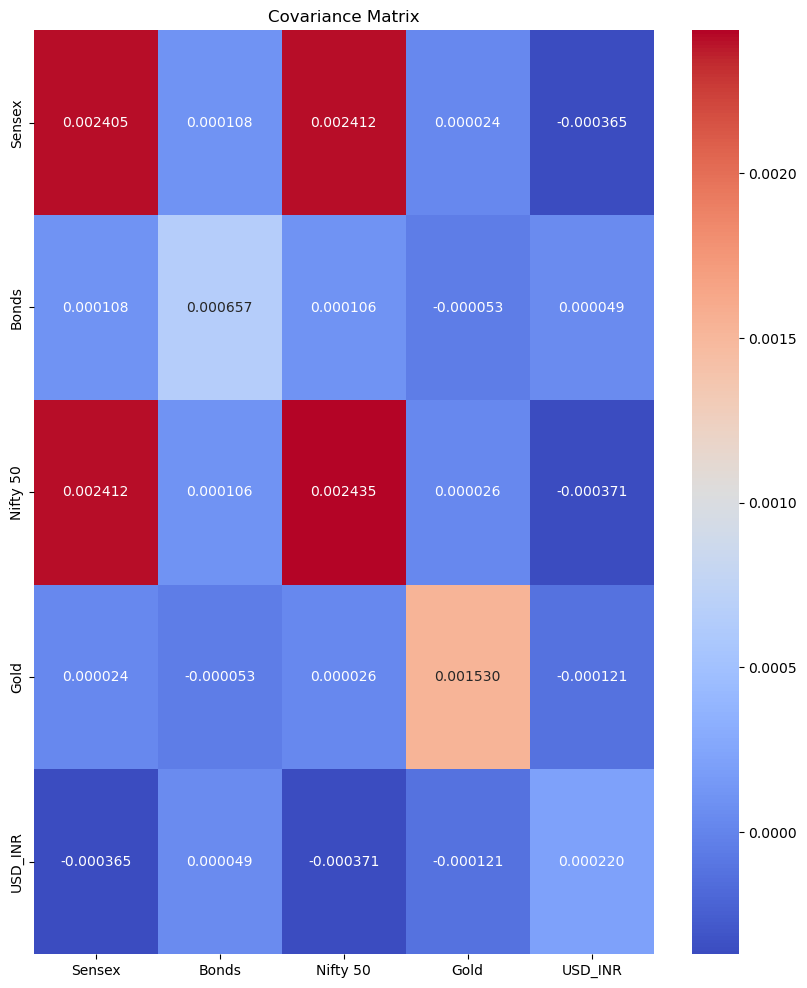

In [30]:
# Calculate the covariance matrix
cov_matrix = returns.cov()

# Calculate volatility (standard deviation of returns)
volatility = returns.std()

# Display covariance matrix and volatility
print("Covariance Matrix:\n", cov_matrix)
print('\n')
print("Volatility:\n", volatility)

# Plot the covariance matrix for better visualization
plt.figure(figsize=(10,12))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".6f")
plt.title('Covariance Matrix')
plt.show()

In [31]:
# Define target risk budgets
risk_budgets = np.array([0.25, 0.15, 0.25, 0.10, 0.25])  # 25% for BSE, 15% for Bonds, 25% for Nifty50, 10% for Gold, 25% for USD_INR

In [32]:
# Function to calculate actual risk contributions
def risk_contributions(weights, cov_matrix):
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))  # Total portfolio variance
    risk_contrib = weights * np.dot(cov_matrix, weights) / portfolio_variance  # Risk contribution for each asset
    return risk_contrib

# Objective function to minimize
def objective_function(weights):
    actual_risk_contrib = risk_contributions(weights, cov_matrix)
    return np.sum((actual_risk_contrib - risk_budgets) ** 2)  # Minimize the squared differences

# Initial weights (equal allocation)
initial_weights = np.array([1/5] * 5)

# Constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Weights must sum to 1
bounds = [(0, 1) for _ in range(5)]  # Weights must be between 0 and 1

# Optimization
result = minimize(objective_function, initial_weights, bounds=bounds, constraints=constraints)

# Get the optimized weights
optimal_weights_rbp = result.x

# Display the optimized weights
print("Optimized Weights for RBP:", optimal_weights_rbp)

Optimized Weights for RBP: [0.18127401 0.39635772 0.18032156 0.24204671 0.        ]


In [38]:
# Calculate actual risk contributions
actual_risk_contributions = risk_contributions(optimal_weights_rbp, cov_matrix)

# Display actual risk contributions
print("Actual Risk Contributions:", actual_risk_contributions)
print("Total Portfolio Risk:", np.sqrt(np.sum(actual_risk_contributions)))

Actual Risk Contributions: [ 0.31239135  0.21257473  0.31254491  0.16248901 -0.        ]
Total Portfolio Risk: 1.0


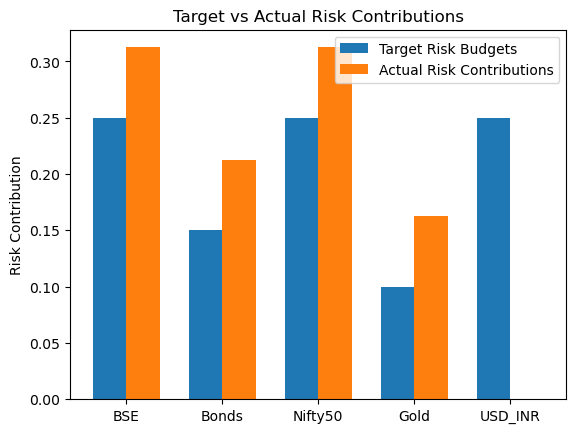

In [34]:
# Plotting target vs actual risk contributions
labels = ['BSE', 'Bonds', 'Nifty50', 'Gold', 'USD_INR']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, risk_budgets, width, label='Target Risk Budgets')
bars2 = ax.bar(x + width/2, actual_risk_contributions, width, label='Actual Risk Contributions')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Risk Contribution')
ax.set_title('Target vs Actual Risk Contributions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

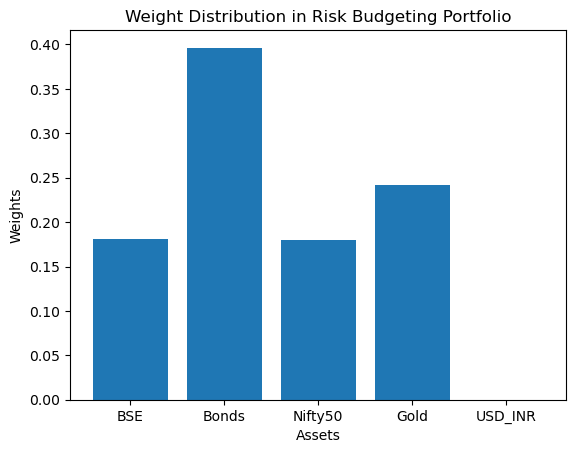

In [35]:
# Plotting weight distribution
plt.bar(labels, optimal_weights_rbp)
plt.title('Weight Distribution in Risk Budgeting Portfolio')
plt.xlabel('Assets')
plt.ylabel('Weights')
plt.show()

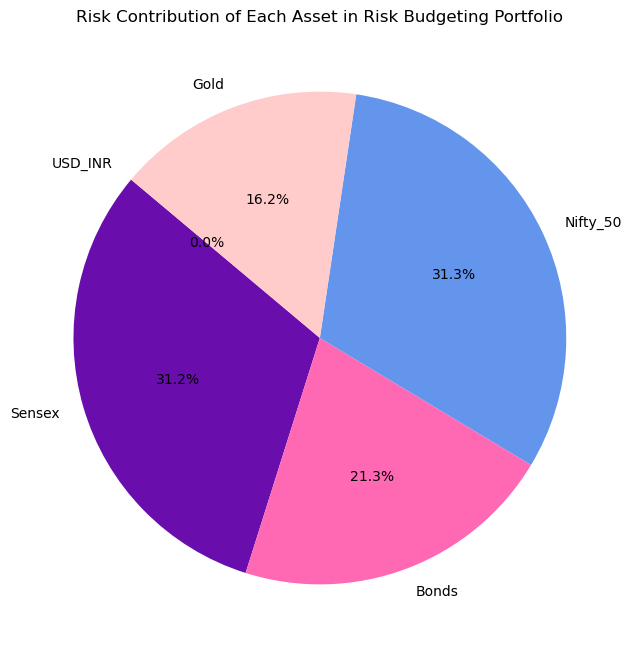

In [2]:
import matplotlib.pyplot as plt

# Original risk contribution values
risk_contributions = [0.31239135, 0.21257473, 0.31254491, 0.16248901, 0.0]
asset_names = ['Sensex', 'Bonds', 'Nifty_50', 'Gold', 'USD_INR']

# Convert contributions to percentages
risk_contributions_percentage = [val * 100 for val in risk_contributions]

# Plotting as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(risk_contributions_percentage, labels=asset_names, autopct='%1.1f%%', startangle=140, colors=['#6a0dad', '#ff69b4', '#6495ed', '#ffcccb', '#ffe4b5'])
plt.title('Risk Contribution of Each Asset in Risk Budgeting Portfolio')
plt.show()